In [1]:
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, Y = datasets.load_iris(return_X_y=True)

In [3]:
print(X.shape)

(150, 4)


In [4]:
import mlgrad.pca as pca

In [5]:
c = pca.location(X)
print(c)

[5.843 3.057 3.758 1.199]


In [6]:
Xc1 = X - c

In [7]:
a1, L1 = pca.find_pc(Xc1, verbose=2)
print(L1, a1)

K: 5 L: 630.0080141889053 PC: [ 0.361 -0.085  0.857  0.358]
* 630.0080141889053
630.0080141889053 [ 0.361 -0.085  0.857  0.358]


In [8]:
Xc2 = pca.project(Xc1, a1)

In [9]:
a2, L2 = pca.find_pc(Xc2, verbose=2)
print(L2, a2)

K: 7 L: 36.157939549437714 PC: [ 0.657  0.730 -0.173 -0.076]
* 36.157939549437714
36.157939549437714 [ 0.657  0.730 -0.173 -0.076]


In [10]:
Xc3 = pca.project(Xc2, a2)

In [11]:
a3, L3 = pca.find_pc(Xc3, verbose=2)
print(L3, a3)

K: 6 L: 11.653214977170387 PC: [-0.582  0.598  0.076  0.546]
* 11.653214977170387
11.653214977170387 [-0.582  0.598  0.076  0.546]


In [12]:
Xc4 = pca.project(Xc3, a3)

In [13]:
a4, L4 = pca.find_pc(Xc4, verbose=2)
print(L4, a4)

K: 3 L: 3.5514289707066493 PC: [ 0.316 -0.320 -0.480  0.754]
* 3.5514289707066493
3.5514289707066493 [ 0.316 -0.320 -0.480  0.754]


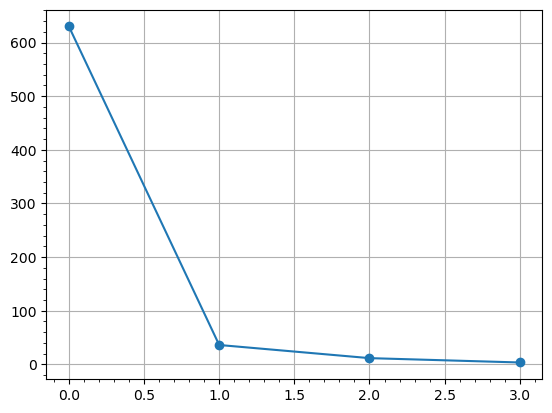

In [14]:
plt.plot([L1,L2,L3,L4], marker='o')
plt.grid(1)
plt.minorticks_on()
plt.show()

In [15]:
U1 = Xc1 @ a1
U2 = Xc1 @ a2
U3 = Xc1 @ a3
U4 = Xc1 @ a4

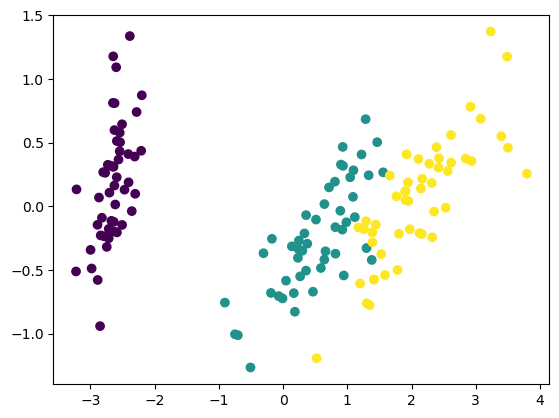

In [16]:
plt.scatter(U1, U2, c=Y)
plt.show()

In [17]:
V1 = U1 @ U1
V2 = U2 @ U2
V3 = U3 @ U3
V4 = U4 @ U4
V = V1+V2+V3+V4
V1 /= V
V2 /= V
V3 /= V
V4 /= V


[0.925 0.053 0.017 0.005]


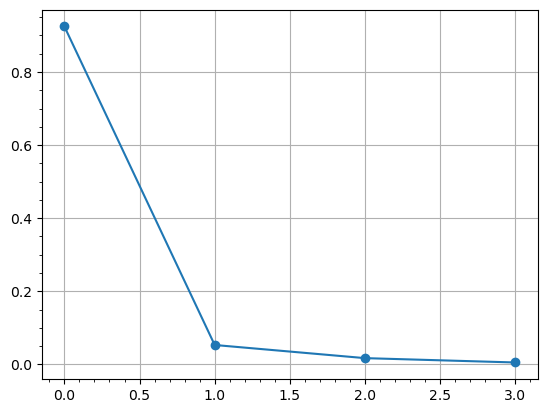

In [18]:
VV = np.array([V1,V2,V3,V4])
print(VV)
plt.plot(VV, marker='o')
plt.grid(1)
plt.minorticks_on()
plt.show()

In [19]:
As = []
Ls = []
Us = []
Xc = Xc0 = X - c
for i in range(4):
    a, L = pca.find_pc(Xc)
    Xc = pca.project(Xc, a)
    U = Xc0 @ a
    As.append(a)
    Ls.append(L)
    Us.append(U)
    
As = np.array(As)
Ls = np.array(Ls)
Us = np.array(Us)

In [20]:
Vs = np.array([U @ U for U in Us])
Vs /= Vs.sum()
print(Vs)

[0.925 0.053 0.017 0.005]


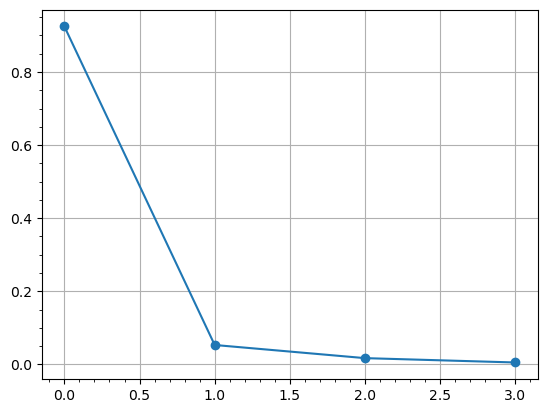

In [21]:
plt.plot(Vs, marker='o')
plt.grid(1)
plt.minorticks_on()
plt.show()